Cyberbot I
===


do a write-up where we go deeper on some pairs - pick 2 self reverting and 1 bot-bot reverting combination -- each take one bot. can do in spreadsheet or notebook. go beyond bullet pointed list -- write a summary of why bot exists, what it does, why it gets reverted. give us a case study. what is the thing that is trying to be done here? deepen qualitative understanding

* why exist
* how long operational
* what percentage reverts
* why reverts itself
* namespaces
* link to code of bot? -- is publicly accessible?
* how does it work
* look at 10, 20 revisions
* look at 10, 20 reverted revisions

points not in order. collect as many links as you can. if find interesting rev, copy url and write why interesting. klepto approach - take as many as you can


subsetting the data
===

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from datetime import datetime

In [4]:
df = pd.read_csv('revs_scored_jan.tsv', sep='\t', header=0)

In [5]:
days = df.rev_timestamp.map(lambda ts: datetime.utcfromtimestamp(ts).day)
df['day'] = days

In [14]:
# isolate data to only data from Jan1-Jan21, edits by Cyberbot

sdf = df[df.day<22]
df_cyberbot = sdf[sdf.user_text == "Cyberbot I"]

In [15]:
len(df_cyberbot)

7824

In [81]:
sdf_another = df[df.is_revert]

cyberbot_reverted = df_cyberbot[df_cyberbot.is_reverted]
cyberbot_reverted = cyberbot_reverted[cyberbot_reverted.seconds_to_revert.astype('str').astype('int')<86400]

sdf1 = df_cyberbot.loc[df_cyberbot.is_reverted, ["rev_id", "user_text", "revert_id", "page_namespace"]]
sdf1.revert_id = sdf1.revert_id.astype('int')

sdf2 = sdf_another[["rev_id", 'user_text', "is_self_revert", "user_is_bot"]]

In [82]:
all_reverts = pd.merge(sdf1, sdf2, 
             how='inner', 
             left_on='revert_id', 
             right_on='rev_id', 
             suffixes=('', '_reverter')
)

In [21]:
all_reverts['reverting_user_is_bot'] = all_reverts['user_is_bot']
del all_reverts["user_is_bot"]

In [83]:
self_reverts = all_reverts[all_reverts.user_text_reverter == "Cyberbot I"]
non_self_reverts = all_reverts[all_reverts.user_text_reverter != "Cyberbot I"]

In [50]:
# variables at this point:
#   df
#   df_cyberbot = all edits by cyberbot
#   cyberbot_reverted = all of cyberbots edits which were reverted w/in 24 hours
#   all_reverts = all of cyberbot's edits reverted w/in 24 hours, with both original rev_id and revert_id
#     self_reverts = all of cyberbot's edits which it self-reverted w/in 24 hours
#     non_self_reverts = all of cyberbot's edits which were reverted by someone else w/in 24 hours

# what percentage of cyberbot's edits were reverted within 24 hours?


In [51]:
len(all_reverts) / len(df_cyberbot) 

0.14506646216768918

## percentage self reverted

In [53]:
len(self_reverts) / len(df_cyberbot)

0.1412321063394683

## percentage reverted by others

In [52]:
len(non_self_reverts) / len(df_cyberbot)

0.003834355828220859

percentage reverted by others is so small! 0.38%. almost all reverts are self reverts

## who reverted them?

In [41]:
cyberbot_reverting_users = all_reverts.groupby('user_text_reverter').count().sort_values('rev_id', ascending=False).reset_index()

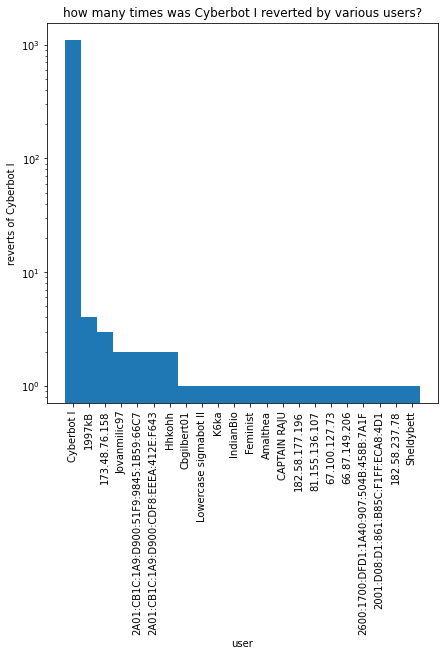

In [44]:
fig, axes = plt.subplots(1, 1, figsize=(7, 7))
y = range(len(cyberbot_reverting_users))
axes.bar(y, cyberbot_reverting_users.rev_id, width=1)
axes.set_yscale('log')
axes.set_xticks(y)
axes.set_xticklabels([f"{row.user_text_reverter}" for row in cyberbot_reverting_users.itertuples()], rotation=90)

axes.set_title("how many times was Cyberbot I reverted by various users?")
axes.set_xlabel("user")
axes.set_ylabel("reverts of Cyberbot I")
plt.show()

Cyberbot requests for approval
===


zeroth request for approval: March 2012 https://en.wikipedia.org/wiki/Wikipedia:Bots/Requests_for_approval/Cyberbot_I
* request eventually withdrawn
* operator made mistakes in application (programming language, not specific enough about tasks)
* trying to take over all tasks of SoxBot, old bot whose operator retired
* people were concerned that he had bitten off more than he could chew by trying to take over all of SoxBot's tasks at once
* source code "coming soon"

first request for approval: March 2012 https://en.wikipedia.org/wiki/Wikipedia:Bots/Requests_for_approval/Cyberbot_I_1
* about 3 weeks after last one
* function: taking over SoxBot's badimage task, same code
* had trial, then extended trial before being approved

note: meaning of transclusion?

second request for approval: August 2012 https://en.wikipedia.org/wiki/Wikipedia:Bots/Requests_for_approval/Cyberbot_I_2
* request is several months later
* functions: "adminstats, cratstats, RfX reporter, tally"
* code available "upon request" - not openly available
* speedily approved

third request for approval: February 2013 https://en.wikipedia.org/wiki/Wikipedia:Bots/Requests_for_approval/Cyberbot_I_3
* again about 6 months later
* function details: "This is an amendment to the adminstats task based off of a couple of requests. As it currently is running, Adminstats are only providing statistics to admins because it acts as an edit counter for non admins which violates WP:BOTPOL. Another statistic that adminstats display is number of accounts being created. I want to open adminstats to account creators now. Per WP:BOTPOL that is technically allowed, but I want input from BAG."
* source code available says no! not available at all I suppose... why?
* approved


fourth request: July 2013 https://en.wikipedia.org/wiki/Wikipedia:Bots/Requests_for_approval/Cyberbot_I_4
* function: takeover of SnotBot, temporary
* specific tasks: are snotbot 10 and 12
* about 6 months later again
* speedily approved

fifth request: July 2013 https://en.wikipedia.org/wiki/Wikipedia:Bots/Requests_for_approval/Cyberbot_I_5
* takeover of Noombot's bookreport script
* approved

sixth request: August 2013 https://en.wikipedia.org/wiki/Wikipedia:Bots/Requests_for_approval/Cyberbot_I_6
* function: create current events page, one of SoxBot's tasks using its original code
* approved

seventh request: July 2015 https://en.wikipedia.org/wiki/Wikipedia:Bots/Requests_for_approval/Cyberbot_I_7
* take over clerking script from Legobot
* approved

eighth (and final) request: October 2015 https://en.wikipedia.org/wiki/Wikipedia:Bots/Requests_for_approval/Cyberbot_I_8
* function: clean the sandbox. old soxbot code, modified
* approved
* source code is now available!
* runs hourly

# namespaces

In [75]:
all_namespaces = df_cyberbot.groupby("page_namespace").count().sort_values("rev_id", ascending=False)

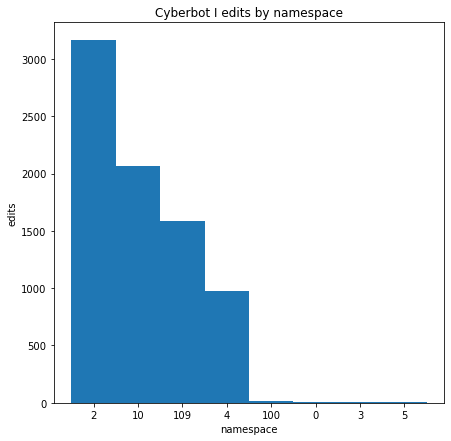

In [87]:
fig, axes = plt.subplots(1, 1, figsize=(7, 7))
y = range(len(all_namespaces))
axes.bar(y, all_namespaces.rev_id, width=1)
axes.set_xticks(y)
axes.set_xticklabels([f"{row.Index}" for row in all_namespaces.itertuples()], rotation=0)

axes.set_title("Cyberbot I edits by namespace")
axes.set_xlabel("namespace")
axes.set_ylabel("edits")
plt.show()

In [78]:
rev_namespaces = cyberbot_reverted.groupby("page_namespace").count().sort_values("rev_id", ascending=False)

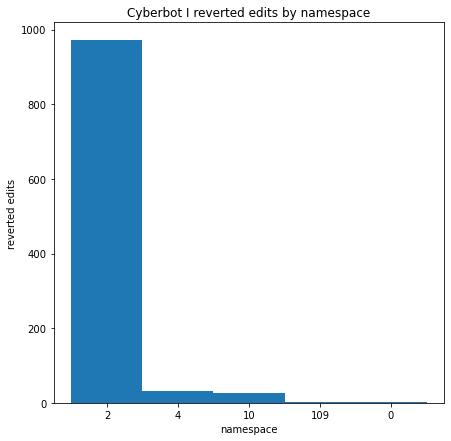

In [80]:
fig, axes = plt.subplots(1, 1, figsize=(7, 7))
y = range(len(rev_namespaces))
axes.bar(y, rev_namespaces.rev_id, width=1)
axes.set_xticks(y)
axes.set_xticklabels([f"{row.Index}" for row in rev_namespaces.itertuples()], rotation=0)

axes.set_title("Cyberbot I reverted edits by namespace")
axes.set_xlabel("namespace")
axes.set_ylabel("reverted edits")
plt.show()

In [85]:
nonself_rev_namespaces = non_self_reverts.groupby("page_namespace").count().sort_values("rev_id", ascending=False)

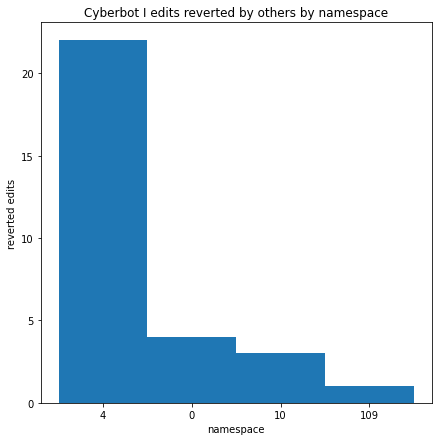

In [86]:
fig, axes = plt.subplots(1, 1, figsize=(7, 7))
y = range(len(nonself_rev_namespaces))
axes.bar(y, nonself_rev_namespaces.rev_id, width=1)
axes.set_xticks(y)
axes.set_xticklabels([f"{row.Index}" for row in nonself_rev_namespaces.itertuples()], rotation=0)

axes.set_title("Cyberbot I edits reverted by others by namespace")
axes.set_xlabel("namespace")
axes.set_ylabel("reverted edits")
plt.show()

# Cyberbot functions


user page: https://en.wikipedia.org/wiki/User:Cyberbot_I

listed tasks, only currently enabled ones:
* SandBot: cleans sandbox every hour, ones on talk pages every 12 hours
* BadImageBot: maintains the bad image list by finding instances of https://en.wikipedia.org/wiki/Template:Badimage / https://en.wikipedia.org/wiki/Template:Restricted_use
    * adding template does nothing, just leaves a note on the image
    * cyberbot finds instances of the template and adds the image to the bad image list
    * transclusion https://en.wikipedia.org/wiki/Help:Transclusion seems extremely confusing
* CurrentEventsBot: generates current event pages for the next day
* AdminStatsBot: updates the adminstats template with info about admin actions (deletes, blocks) https://en.wikipedia.org/wiki/Template:Adminstats
    * place template on userpage or user subpage, bot creates stats page and updates it every 24 hours
    * gives info about number of pages / revisions deleted, users blocked / unblocked, that sort of thing
* CratStats: updates the cratstats template with info about open AfAs, RfBs, CHU requests https://en.wikipedia.org/wiki/Template:Cratstats
    * AfA -> RfA (request for adminship), want to become admin
    * RfB (request for bureaucratship)
    * CHU - no idea
    * cratstats also shows BRFAs (bot requests for approval)
* RfX reporter: updates User:Cyberpower678/RfX_Report with info about current RfAs and RfBs 
    * https://en.wikipedia.org/wiki/User:Cyberpower678/RfX_Report
    * shows candidate, time left, tally of votes
* RfX TallyBot: updates Cyberpower678/Tally with the current tallies of all the open RfXs
    * visible content of page: only (?/?/?)
    * not visible content: various usernames, all with (0/0/0) next to them. why are all the counts 0?
    * did find one version with actual numbers, only in first loc. shows numbers matching S/O/N (Support/Oppose/Neutral) format on RfX report page?
* AdminHighlighterBot: creates a list of admins at User:Cyberbot_I/adminrights-admins.js for another bot? Ais523's highlighter script
    * Ais523 is a semi-retired user who writes scripts
    * page is literally just a list of users with admin rights
* DateFixBot: date fixes maintenance tags
    * can't find much, but I assume this means tags such as ref needed or original research
    * another approval request from March 2012: https://simple.wikipedia.org/wiki/Wikipedia:Bots/Fulfilled_requests/2012#Cyberbot_I
* BookReportBot: generates reports for books within Category:Wikipedia_books_(community_books)
    * https://en.wikipedia.org/wiki/Category:Wikipedia_books_(community_books)
    * books namespace is now officially deprecated, going to be deleted. guess this won't be running anymore
* AfDBot: clerks at AfDs (converted to PHP - originally SnotBot python)
    * https://en.wikipedia.org/wiki/Wikipedia:Articles_for_deletion
    * articles for deletion
    * found only one cyberbot edit, transcluding something
    * most edits pertaining to this seem to be on page: https://en.wikipedia.org/wiki/User:Cyberbot_I/Current_AfD%27s
* RfPPBot: clerks and archives at RfPP (converted to PHP - originally SnotBot python)
    * requests for page protection https://en.wikipedia.org/wiki/Wikipedia:Requests_for_page_protection
    * several instances of bot archiving threads
* RfUBot: maintains unblock table for users requesting unblock (converted to PHP - originally SnotBot python)
    * https://en.wikipedia.org/wiki/User:Cyberbot_I/Requests_for_unblock_report
    * info about when blocked, when last edit, etc
* CHUBot: clerks at WP:CHUS
    * https://en.wikipedia.org/wiki/Wikipedia:Changing_username/Simple
    * requests to change username
    * notes if there are any issues with the requested username (another user already has that name or contains unusable characters)

note: all of the tasks listed on this page seem to have been covered by another bot at one point and added to cyberbot I's list. user has cyberbot II for his own code possibly?

# Cyberbot I: random sample of edits and analysis

In [54]:
df_cyberbot.sample(n=20, random_state=10)[["rev_id", "page_id", "is_minor", "is_revert", "is_reverted", "page_namespace", "seconds_to_prev", "damaging_pred", "goodfaith_pred"]].reset_index()

,index,rev_id,page_id,is_minor,is_revert,is_reverted,page_namespace,seconds_to_prev,damaging_pred,goodfaith_pred
0,604511,876857914,352651,False,False,False,4,73,0.006925,0.991412
1,166853,876400051,45514171,True,False,False,109,6431770,0.008596,0.994566
2,25927,876254025,39008263,True,False,False,10,85800,0.008977,0.993623
3,1579570,877870409,42414676,True,False,False,109,11560743,0.006855,0.995447
4,158789,876391750,35159700,False,False,False,2,1557,0.007126,0.990445
5,2928072,879276370,21083350,True,False,False,10,88589,0.010086,0.991916
6,2785160,879127746,48564490,True,False,True,10,3890847,0.010453,0.990951
7,2960799,879310786,35159700,False,False,False,2,209,0.013086,0.990231
8,839153,877101856,16283969,False,True,False,4,1836,0.011849,0.993206
9,2012462,878321999,45160445,True,False,False,10,83901,0.010055,0.992097


0. 876857914 on RfPP page, re-ordered requests according to time stamps
1. 876400051 part of bookreport task. changing article status (to what their pages currently say?) and adds "|non-free=" to template
2. 876254025 updating someone's admin stats
3. 877870409 part of bookreport task. removed a gif from the report (can't be included in a book?)
4. 876391750 on RfX report, updated count for a vote and timestamp of latest update
5. 879276370 updating someone's admin stats
6. 879127746 updating someone's admin stats, except ***note: possible malfunction, stats go way down*** month long break since last edit. they later go back up in the next edit. as I skip through edits, they keep going up and down a bit, but never by as much as in the original edit
7. 879310786 adds RfB to RfX page and deletes line that says there are no current RfXs
8. 877101856 clears sandbox of all content, preserving header
9. 878321999 updating admin stats
10. 878493763 AfD report. list of AfD's which are apparently closed but remain on CAT:AfD. made no substantial changes, only updated time that page was last updated by the bot
11. 877805941 updating current AfD's list under its own user page.
12. 876411075 updating RfU page, time of last update and adding requests
13. 878300940 part of bookreport task, updating the status of an article to GA and changing count accordingly
14. 878977612 updating admin stats
15. 879125181 updating admin stats
16. 877860705 created bookreport for a new book
17. 876417475 updating admin stats
18. 876586515 updating admin stats
19. 878843141 updating RfU page, adding users and changing time of last update

# Cyberbot I: random sample of self-reverted edits and analysis

In [92]:
self_reverts.sample(n=20, random_state=10)[["rev_id", "revert_id", "page_namespace", "is_self_revert"]].reset_index()

,index,rev_id,revert_id,page_namespace,is_self_revert
0,121,876298739,876299957,2,True
1,386,876419906,876419911,2,True
2,11,876236234,876236236,2,True
3,1014,877964065,878327233,109,True
4,278,876379526,876379530,2,True
5,22,876244479,876244481,2,True
6,508,876499556,876499557,2,True
7,303,876389508,877836835,109,True
8,624,876579688,876581520,2,True
9,574,876560791,877832084,109,True


0. first one adds 3 users to page, second delets the same three users. 12 min apart, consecutive edits
1. 